In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [28]:
comments_df = pd.read_csv("comments_stats.csv")
strings_df = pd.read_csv("strings_stats.csv")

single_lang_comments_df = pd.read_csv("single_lang_comments_stats.csv")
single_lang_identifiers_df = pd.read_csv("single_lang_identifiers_stats.csv")
single_lang_strings_df = pd.read_csv("single_lang_strings_stats.csv")

In [32]:
def get_chart(languages_full, counts, bar_color, save_path):
  # Define the three-color palette
  palette_three = ['#0072B2', '#D55E00', '#009E73']

  # Create figure and main bar chart
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.bar(languages_full, counts, color= bar_color)
  ax.set_yscale('log')
  ax.set_ylabel('Counts (log scale)')
  ax.tick_params(axis='x', rotation=45)

  # Inset pie chart for the other 9 languages (even larger size)
  rest_labels = languages_full[1:]
  rest_counts = counts[1:]
  pie_colors = [palette_three[i % len(palette_three)] for i in range(len(rest_counts))]

  inset_ax = ax.inset_axes([0.38, 0.38, 0.6, 0.6])  # 60% size
  inset_ax.pie(
      rest_counts,
      labels=rest_labels,
      autopct='%1.1f%%',
      startangle=140,
      colors=pie_colors,
  )

  plt.tight_layout()
  fig.savefig(save_path, dpi=600, bbox_inches="tight")


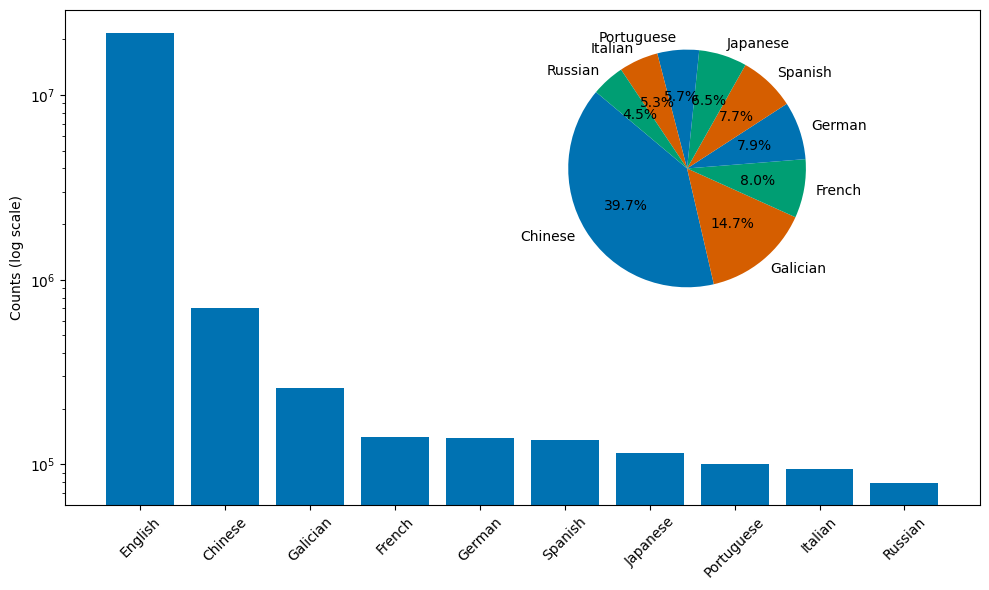

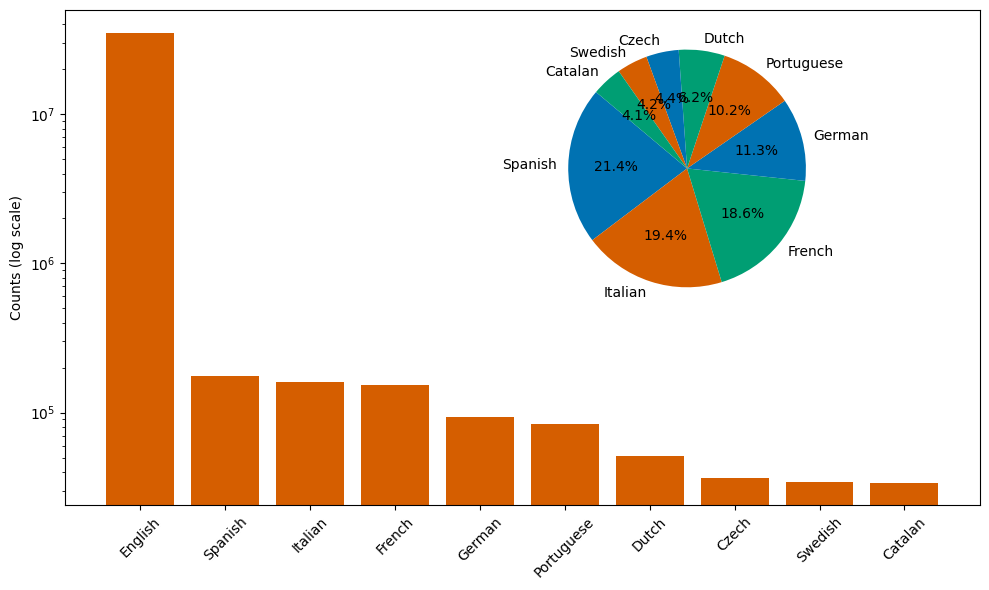

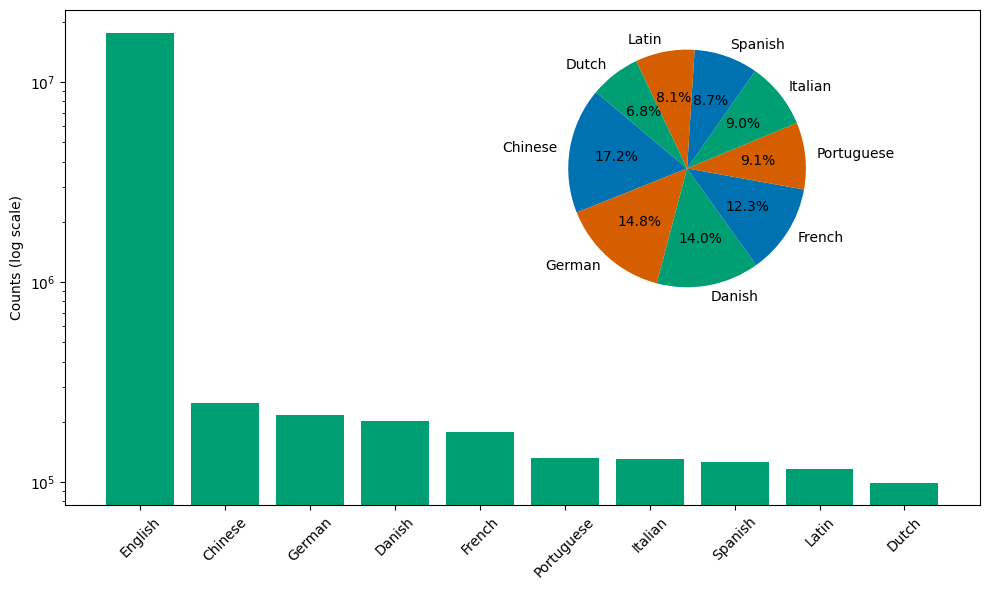

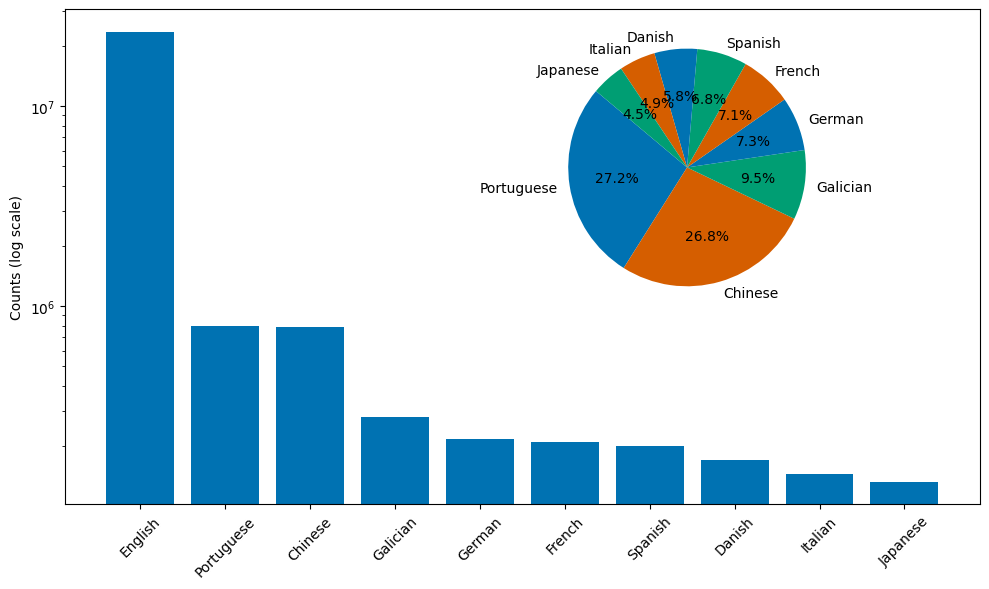

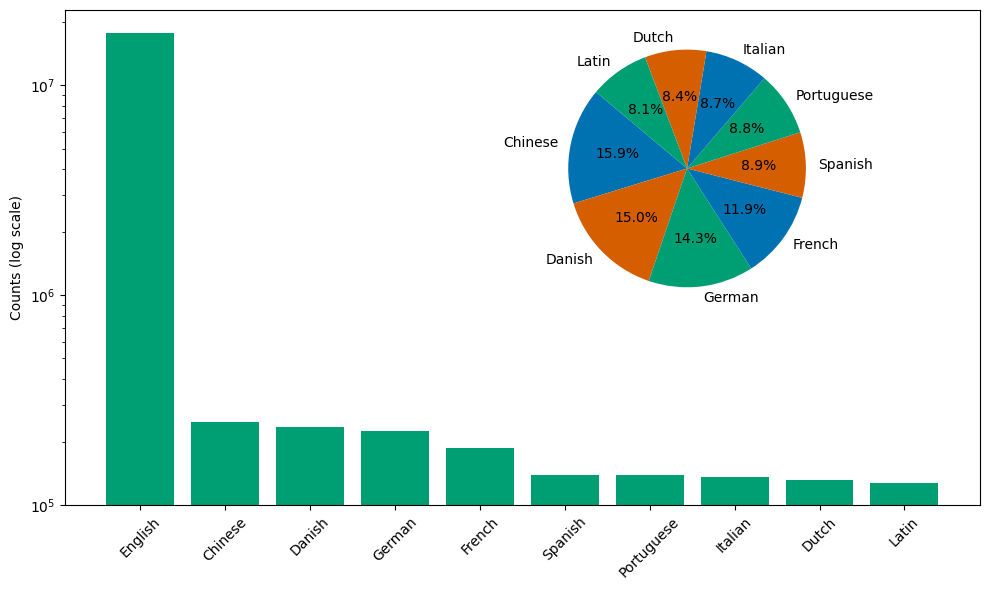

In [34]:
get_chart(single_lang_comments_df['language'].values, single_lang_comments_df['freq'].values, '#0072B2', "single_lang_comments_distribution.pdf")
get_chart(single_lang_identifiers_df['language'].values, single_lang_identifiers_df['freq'].values, '#D55E00', "single_lang_identifiers_distribution.pdf")
get_chart(single_lang_strings_df['language'].values, single_lang_strings_df['freq'].values, '#009E73', "single_lang_strings_distribution.pdf")
get_chart(comments_df['language'].values, comments_df['freq'].values, '#0072B2', "comments_distribution.pdf")
get_chart(strings_df['language'].values, strings_df['freq'].values, '#009E73', "strings_distribution.pdf")